In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
from pathlib import Path
from app.dataset.flat_data_module import FlatDataModule
import torch
from app.dataset.panoptic.camera import display_points

clip_path = Path("/home/juanpablo/cv_datasets/171204_pose3")

data_module = FlatDataModule(clip_path, batch_size=16)
train_dl = data_module.train_dataloader()
batch = next(iter(train_dl))

p = batch["p"]
inv_p = batch["inv_p"]
joints = batch["joints"]
image = batch["image"]

batch["inv_p"].shape, batch["joints"].shape

(torch.Size([16, 4, 3]), torch.Size([16, 4, 19]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[-2.2614e-01,  9.1556e-02,  2.8450e-01,  ...,  1.4593e-01,
          -2.3584e-01, -1.6164e-01],
         [-1.4409e-01,  5.8346e-02,  1.8127e-01,  ...,  9.2984e-02,
          -1.5028e-01, -1.0299e-01],
         [-2.4071e-01,  9.7115e-02,  3.0291e-01,  ...,  1.5510e-01,
          -2.5054e-01, -1.7217e-01],
         [ 8.3972e-04, -3.3995e-04, -1.0554e-03,  ..., -5.3984e-04,
           8.7549e-04,  5.9943e-04]],

        [[-1.7065e-01,  4.7535e-01,  1.7378e-01,  ...,  1.6939e-01,
           8.2810e-02, -3.9221e-01],
         [-1.0873e-01,  3.0288e-01,  1.1072e-01,  ...,  1.0793e-01,
           5.2745e-02, -2.4987e-01],
         [-1.8158e-01,  5.0573e-01,  1.8525e-01,  ...,  1.8020e-01,
           8.8633e-02, -4.1823e-01],
         [ 6.3312e-04, -1.7632e-03, -6.4491e-04,  ..., -6.2600e-04,
          -3.0586e-04,  1.4556e-03]],

        [[-1.6306e-01,  3.1322e-02,  3.1878e-01,  ...,  2.5405e-01,
          -1.7345e-01, -1.4565e-01],
         [-1.0390e-01,  1.9972e-02,  2.0310e-01,  .

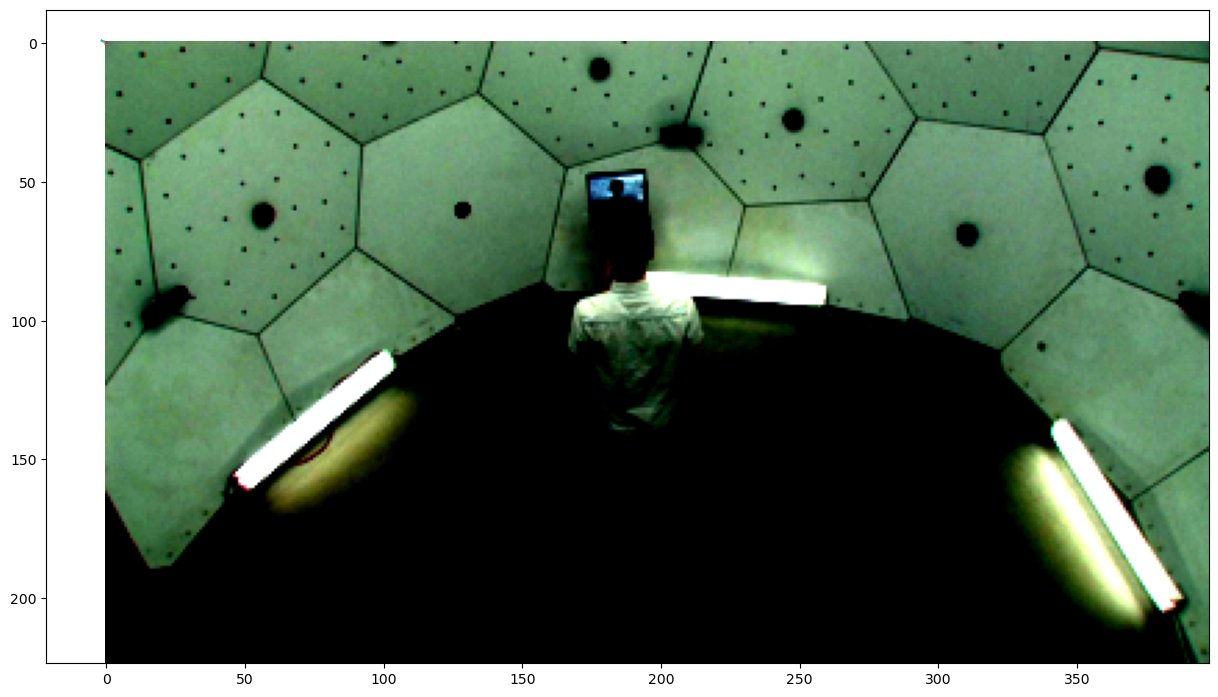

In [61]:
from app.model.proj_module import ProjModule

proj_module = ProjModule()
output = proj_module.forward(batch["image"], batch["inv_p"])
display_points(output[0].T.detach(), p[0], image[0], 224/1080)
output

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([16, 3, 4]) torch.Size([16, 4, 3]) torch.Size([16, 4, 19])
torch.Size([16, 3, 19])
torch.Size([16, 4, 19])


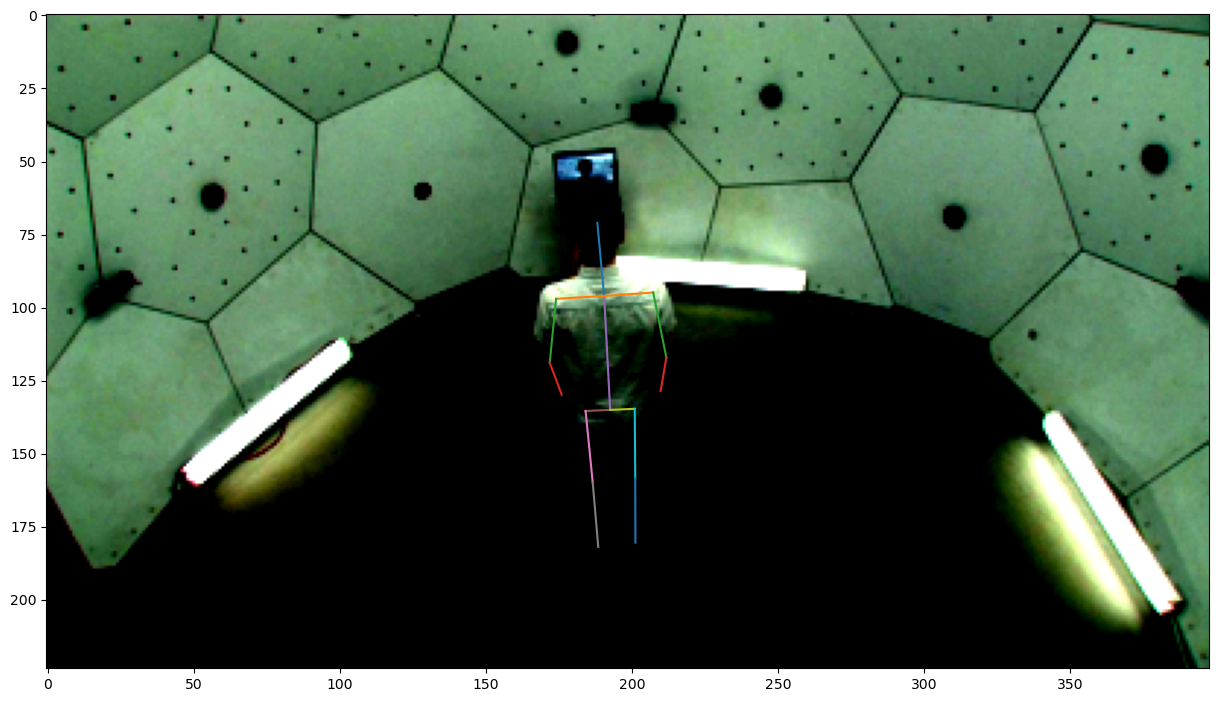

In [55]:
print(p.shape, inv_p.shape, joints.shape)

x_proj = torch.einsum("ntf,nfj->ntj", p, joints)
print(x_proj.shape)

x_backproj = torch.einsum("nft,ntj->nfj", inv_p, x_proj)
print(x_backproj.shape)

display_points(x_backproj[0].T, p[0], image[0], 224/1080)
